# Captcha Solver

## Simple captcha solver

In [281]:
from importlib import reload
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from imutils import paths
import numpy as np
import pickle
from keras.models import load_model

import char_detection
import preprocess
import model_definition
import utils

reload(char_detection)
reload(preprocess)
reload(model_definition)
reload(utils)

<module 'utils' from '/home/inesmcm/Desktop/projects/captcha-solver/src/utils.py'>

#### Preprocessing images

Whole captcha images are cropped into new images containing each character

In [104]:
SIMPLE_CAPTCHA_FOLDER = '../data/simple_captcha'
SIMPLE_CHAR_FOLDER = '../data/simple_characters'
HARD_CAPTCHA_FOLDER = '../data/hard_captcha'
HARD_CHAR_FOLDER = '../data/hard_characters'

SIMPLE_LABEL_BINARIZER = '../models/one_hot/simple_label_binarizer.dat'
HARD_LABEL_BINARIZER = '../models/one_hot/hard_label_binarizer.dat'

SIMPLE_MODEL = '../models/CNN/simple_captcha_model.hdf5'
HARD_MODEL = '../models/CNN/hard_captcha_model.hdf5'

Preprocess the raw captcha images by croping each character into a new file

In [25]:
char_detection.simple_char_detection(SIMPLE_CAPTCHA_FOLDER, SIMPLE_CHAR_FOLDER)

Now we prepare the data for training y getting each preprocessed character image and respective labels

In [76]:
data, labels = preprocess.load_chars(SIMPLE_CHAR_FOLDER)

In [77]:
data.shape

(38744, 20, 20, 1)

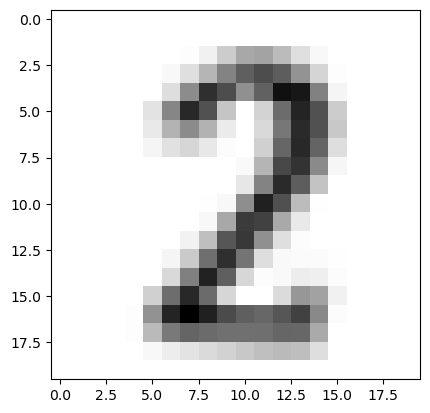

In [173]:
plt.imshow(data[0], cmap = 'gray')

The images should be normalized to achieve better performance

In [80]:
data = data / 255

The data is splitted into train, validation and test sets

In [81]:
X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size = 0.25, random_state=0, stratify=labels)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size = 0.25, random_state=0, stratify=y_train)

In order to train the multi-class classification model, each character needs to be converted to a one hot encode. To do that we use a LabelBinarizer and we save it to later decode the network's outputs.

In [82]:
y_train, y_val, y_test = preprocess.one_hot_labels(y_train, y_val, y_test, SIMPLE_LABEL_BINARIZER)

The model is created and trained

In [99]:
model = model_definition.simple_CNN()

In [100]:
model.fit(X_train, y_train, validation_data=(X_val, y_val), batch_size = 32, epochs = 10, verbose = 1)

Epoch 1/10
682/682 [==============================] - 41s 60ms/step - loss: 0.2557 - accuracy: 0.9377 - val_loss: 0.0199 - val_accuracy: 0.9960
Epoch 2/10
682/682 [==============================] - 45s 67ms/step - loss: 0.0151 - accuracy: 0.9962 - val_loss: 0.0154 - val_accuracy: 0.9970
Epoch 3/10
682/682 [==============================] - 40s 59ms/step - loss: 0.0067 - accuracy: 0.9978 - val_loss: 0.0181 - val_accuracy: 0.9967
Epoch 4/10
682/682 [==============================] - 47s 69ms/step - loss: 0.0105 - accuracy: 0.9975 - val_loss: 0.0246 - val_accuracy: 0.9919
Epoch 5/10
682/682 [==============================] - 40s 58ms/step - loss: 0.0039 - accuracy: 0.9988 - val_loss: 0.0122 - val_accuracy: 0.9966
Epoch 6/10
682/682 [==============================] - 44s 65ms/step - loss: 0.0015 - accuracy: 0.9996 - val_loss: 0.0047 - val_accuracy: 0.9982
Epoch 7/10
682/682 [==============================] - 50s 73ms/step - loss: 0.0018 - accuracy: 0.9997 - val_loss: 0.0049 - val_accuracy:

In [105]:
model.save(SIMPLE_MODEL)

In [250]:
model = load_model(SIMPLE_MODEL)

It achieves a very good performance for training and validation. Let's see how it performs on the test set!

In [208]:
model.evaluate(X_test, y_test, batch_size=32)

303/303 [==============================] - 3s 8ms/step - loss: 0.0337 - accuracy: 0.9908


[0.03369162231683731, 0.9908114671707153]

The model seems to be well trained. Now, let's see it in action:

1/1 [==============================] - 0s 69ms/step
CAPTCHA text is ZEB8


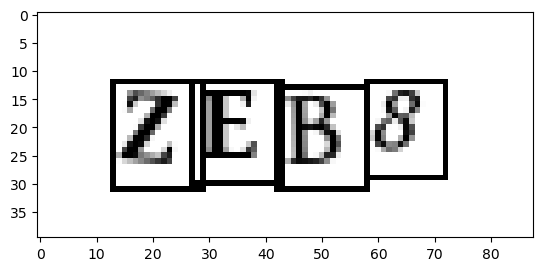

1/1 [==============================] - 0s 52ms/step
CAPTCHA text is TJHJ


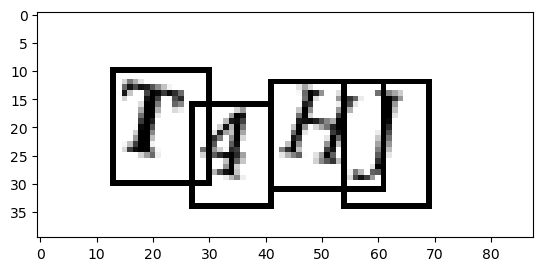

1/1 [==============================] - 0s 32ms/step
CAPTCHA text is RP84


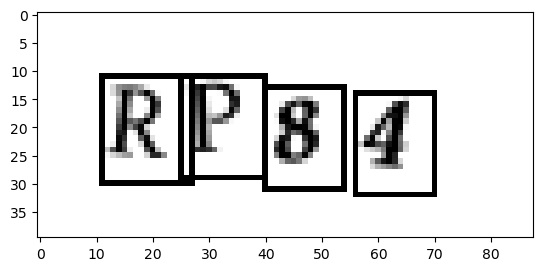

1/1 [==============================] - 0s 36ms/step
CAPTCHA text is 9FNQ


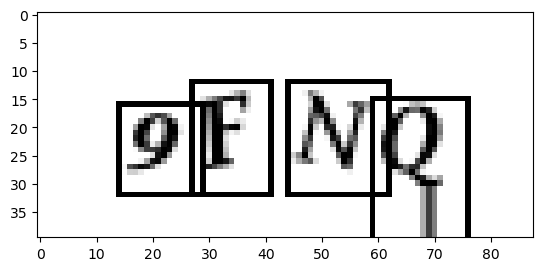

1/1 [==============================] - 0s 26ms/step
CAPTCHA text is LHCH


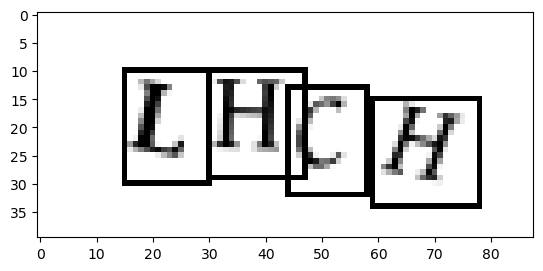

In [285]:
images = list(paths.list_images(SIMPLE_CAPTCHA_FOLDER))
images = np.random.choice(images, size=(5,), replace=False)

# load label enconder
with open(SIMPLE_LABEL_BINARIZER, 'rb') as f:
    lb = pickle.load(f)

for img_path in images:

    img, char_bound_box = char_detection.img2chars(img_path)

    if char_bound_box is None:
        continue

    # img_bound_boxes = utils.draw_bound_boxes(img, char_bound_box)
    
    captcha_text = utils.img_predict(model, lb, char_bound_box)

    print("CAPTCHA text is {}".format(captcha_text))
    plt.imshow(img, cmap = 'gray')
    plt.show()

## Hard Captcha Solver

In [12]:
char_detection.hard_char_detection(HARD_CAPTCHA_FOLDER, HARD_CHAR_FOLDER)